# <span style="color:blue"> INDR 422/522 - LAB NO. 4</span>
## <span style="color:GREEN">Regression Model</span>

### <span style="color:RED">MAIN TOPICS</span>
#### <span style="padding-left: 30px;color:GRAY">1. Regression Model on Google Share Price </span>
#### <span style="padding-left: 30px;color:GRAY">2. Regression Model on Australian Beer Production </span>

### <span style="color:RED">INSTALLING REQUIRED TOOLS</span>

In [1]:
# First, you need to install the packages once on your PC. Open a new cell, add following codes (commented ones) -
# and run it, then import following tools:
# pip install matplotlib
# pip install bbplot
# pip install pandas
# pip install numpy

import matplotlib.pyplot as plt
import statsmodels.api as sm
from bbplot import bijan
import pandas as pd
import numpy as np

### <span style="color:RED">Error Formulas</span>

<span style="color:GRAY">
$
\begin{aligned}
MAE  &= \frac{1}{n} \sum_{n} |Actual-Estimate| && \text{*** Mean Absolute Error}\\    
MAPE &= \frac{1}{n} \sum_{n} |\frac{Actual-Estimate}{Actual}| && \text{*** Mean Absolute Percentage Error}\\
MSE &= \frac{1}{n} \sum_{n} (Actual-Estimate)^2 && \text{*** Mean Squared Error}\\
RMSE &= \sqrt{MSE} && \text{*** Root Mean Square Error}\\
\end{aligned}
$</span>

### <span style="color:RED">Q1. Fit models that capture linear and non-linear effects</span>

In [2]:
# let's import data into our notebook and take a look at the data frame

df = pd.read_csv('GooglePrice.csv', header=0)
day = df['Day']
price_actual = df['Price']
df

,Day,Price
0,1,2064.879883
1,2,2070.860107
2,3,2095.169922
3,4,2031.359985
4,5,2036.859985
...,...,...
248,249,2706.000000
249,250,2728.510010
250,251,2749.750000
251,252,2646.169922


### <span style="color:GREEN">Q1. (a) </span>
#### <span style="color:BLACK">Fit the following model to the whole data using OLS:</span>
#### $y_t = \beta_0  + \beta_1 t + \epsilon_{t}$

In [3]:
# let's run a linear regression Price_t= beta_0 + beta_1 * t + eps_t
# here we run regression for price (y_t) based on day (t)

lm = sm.OLS.from_formula('Price ~ Day', df) 
model_1 = lm.fit()

# results of the OLS regression
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     619.5
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           9.84e-70
Time:                        15:48:54   Log-Likelihood:                -1633.4
No. Observations:                 253   AIC:                             3271.
Df Residuals:                     251   BIC:                             3278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2197.6246     19.501    112.694      0.000    2159.218    2236.031
Day            3.3131      0.133     24.890      0.000       3.051       3.575
==============================================================================
Omnibus:                       13.705   Durbin-Watson:                   0.068
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.010
Skew:                          -0.590   Prob(JB):                     0.000550
Kurtosis:                       2.818   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style="color:GREEN">Q1. (b) </span>
#### <span style="color:BLACK">Explore the results summary and see whether the regression is signifficant</span>

In [4]:
model_1.params

Intercept    2197.624573
Day             3.313060
dtype: float64

In [5]:
# Extract data from above table:

print('R-squared:         ', model_1.rsquared)
print('Prob(F-statistic): ', model_1.f_pvalue)
print('Intercept:         ', model_1.params.Intercept)
print('Coef_Day:          ', model_1.params.Day)
print('p-values:')
model_1.pvalues

R-squared:          0.7116598269511111
Prob(F-statistic):  9.838719370385123e-70
Intercept:          2197.6245731907597
Coef_Day:           3.313060098961688
p-values:


Intercept    5.908250e-217
Day           9.838719e-70
dtype: float64

### <span style="color:GREEN">Q1. (c) </span>
#### <span style="color:BLACK">Compute the MSE and RMSE of the fitted model</span>

In [11]:
# Predict price based on Day 
price_pred_1 = model_1.predict(df)

# Calculate the residual
resid = price_actual - price_pred_1

# Calculate the error terms
mse1= np.mean(np.square(resid)) 
rmse1 = np.sqrt(mse1)
corr1 = np.corrcoef(price_pred_1,price_actual)[0,1] # let's check the correlation between the predictions and the actual values
print('MSE Model 1  =', mse1)
print('RMSE Model 1 =', rmse1)
print('RMSE Model 1 =', rmse1)
print('Correlation Model 1=', np.square(corr1)) # note that the squared correlation coefficient equals the R-squared value

MSE Model 1  = 23721.619942937414
RMSE Model 1 = 154.0182454871416
RMSE Model 1 = 154.0182454871416
Correlation Model 1= 0.7116598269511112


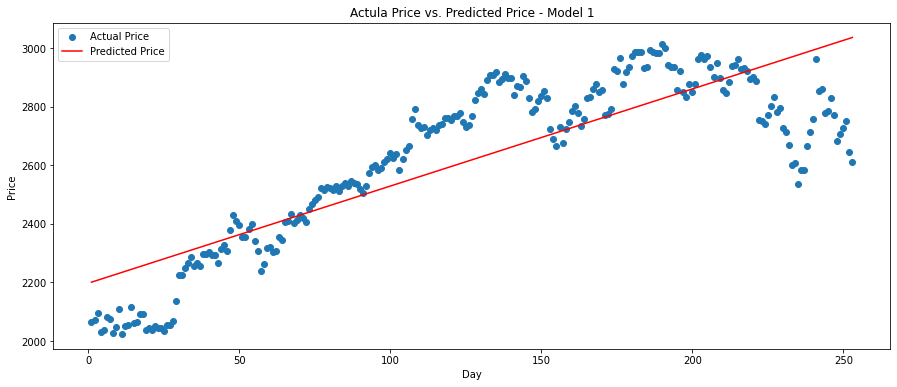

In [7]:
# Plot actual price vs. predicted price of Model 1

plt.figure(figsize = (15, 6))
plt.scatter(x=day, y=price_actual, label='Actual Price')
plt.plot(day, price_pred_1, 'r', label='Predicted Price')
plt.xlabel("Day")
plt.ylabel("Price")
plt.title("Actula Price vs. Predicted Price - Model 1")
plt.legend()
plt.show()

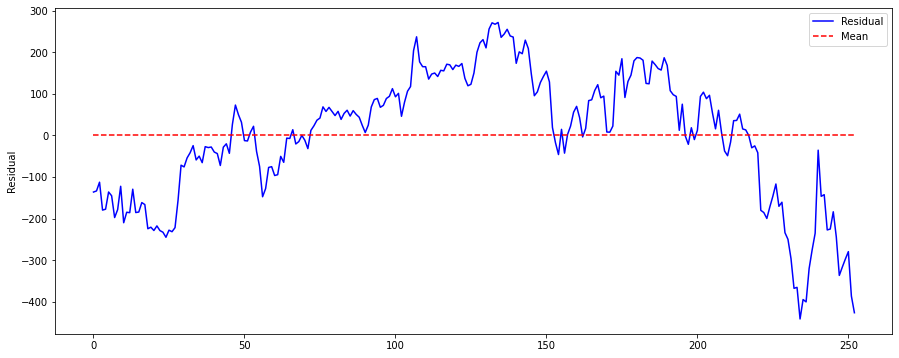

Mean of Residual:    -8.268133652481166e-13
S.D. of Residual:    154.323534677668
Half Width :         19.107803523093654   (degree of freedom = 252, Confidence Level = 0.95)
p-value :            1.0000


In [8]:
# let's take a look at residuals of Model 1

bijan.resid(resid)

### <span style="color:GREEN">Q1. (d) </span>
#### <span style="color:BLACK">Fit the following model to the whole data using OLS:</span>
#### $y_t = \beta_0  + \beta_1 t + \beta_2 \sqrt{t} + \beta_3 t^2 + \epsilon_{t}$

In [9]:
# Add squared root and square of Day to our dataframe

df['Sqrt_Day'] = np.sqrt(day)
df['Sqr_Day'] = day**2
df

,Day,Price,Sqrt_Day,Sqr_Day
0,1,2064.879883,1.000000,1
1,2,2070.860107,1.414214,4
2,3,2095.169922,1.732051,9
3,4,2031.359985,2.000000,16
4,5,2036.859985,2.236068,25
...,...,...,...,...
248,249,2706.000000,15.779734,62001
249,250,2728.510010,15.811388,62500
250,251,2749.750000,15.842980,63001
251,252,2646.169922,15.874508,63504


In [10]:
# let's now fit a different model with more predictors Price_t= beta_0 + beta_1 t + beta_2 sqrt(t) + beta_3 t^2+ eps_t
#Note that the predictors are already in the data file.

lm2 = sm.OLS.from_formula('Price ~ Day + Sqrt_Day + Sqr_Day', df)
model_2 = lm2.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1236.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          3.40e-149
Time:                        23:59:36   Log-Likelihood:                -1440.8
No. Observations:                 253   AIC:                             2890.
Df Residuals:                     249   BIC:                             2904.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2207.3790     43.714     50.496      0.000    2121.282    2293.476
Day           19.8417      1.304     15.219      0.000      17.274      22.409
Sqrt_Day    -111.2141     14.968     -7.430      0.000    -140.695     -81.733
Sqr_Day       -0.0432      0.002    -18.802      0.000      -0.048      -0.039
==============================================================================
Omnibus:                        9.814   Durbin-Watson:                   0.308
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.833
Skew:                          -0.450   Prob(JB):                      0.00733
Kurtosis:                       3.352   Cond. No.                     2.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <span style="color:GREEN">Q1. (e) </span>
#### <span style="color:BLACK">Explore the results summary and see whether the regression is signifficant</span>

In [11]:
# Extract data from above table:

print('R-squared:         ', model_2.rsquared)
print('Prob(F-statistic): ', model_2.f_pvalue)
print('Intercept:         ', model_2.params.Intercept)
print('Coef_Day:          ', model_2.params.Day)
print('Coef_Sqrt_Day:     ', model_2.params.Sqrt_Day)
print('Coef_Sqr_Day:      ', model_2.params.Sqr_Day)
print('p-values:')
model_2.pvalues

R-squared:          0.9370862447311153
Prob(F-statistic):  3.3976491777822453e-149
Intercept:          2207.3790094325136
Coef_Day:           19.841693452667513
Coef_Sqrt_Day:      -111.21410635841416
Coef_Sqr_Day:       -0.04315206088173905
p-values:


Intercept    7.978180e-133
Day           2.009130e-37
Sqrt_Day      1.735665e-12
Sqr_Day       1.097327e-49
dtype: float64

### <span style="color:GREEN">Q1. (f) </span>
#### <span style="color:BLACK">Compute the MSE and RMSE of the fitted model</span>

In [12]:
# Predict price based on Day + Square Root of Day and Square of Day
price_pred_2 = model_2.predict(df)

# Calculate the residual
resid = price_actual - price_pred_2

# Calculate the error terms
mse2= np.mean(np.square(resid)) 
rmse2 = np.sqrt(mse2)

print('MSE of Model 2  =', mse2)
print('RMSE of Model 2 =', rmse2)

MSE of Model 2  = 5175.88713321059
RMSE of Model 2 = 71.94363858751231


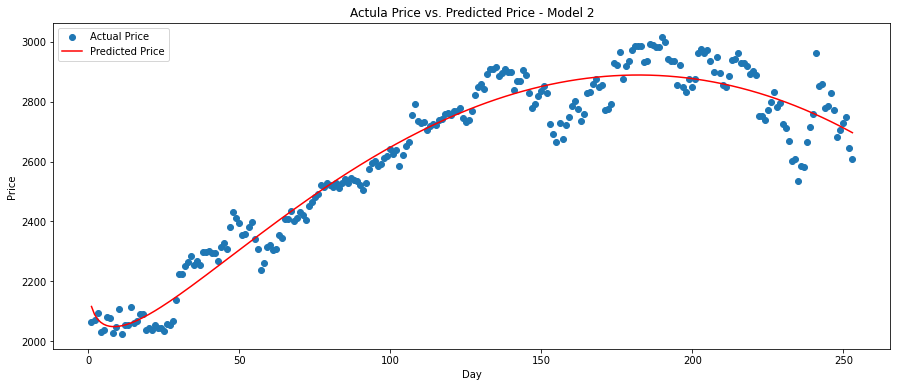

In [13]:
# Plot actual price vs. predicted price of Model 2

plt.figure(figsize = (15, 6))
plt.scatter(x=day, y=price_actual, label='Actual Price')
plt.plot(day, price_pred_2, 'r', label='Predicted Price')
plt.xlabel("Day")
plt.ylabel("Price")
plt.title("Actula Price vs. Predicted Price - Model 2")
plt.legend()
plt.show()

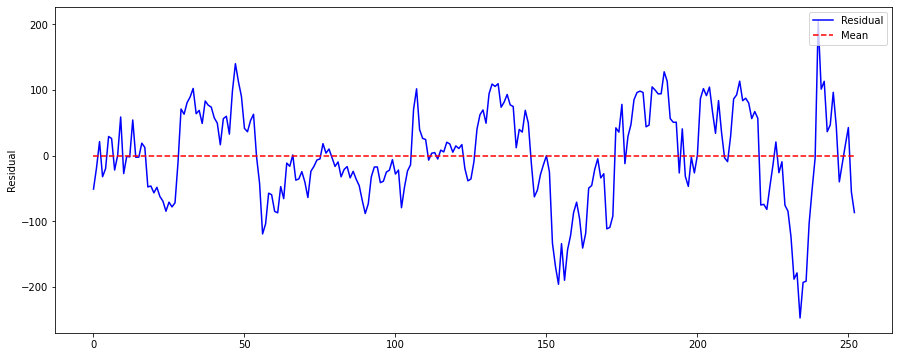

Mean of Residual:    2.1262422371738526e-09
S.D. of Residual:    72.0862425700368
Half Width :         8.925467930884922   (degree of freedom = 252, Confidence Level = 0.95)
p-value :            1.0000


In [14]:
# let's take a look at residuals of Model 2

bijan.resid(resid)

### <span style="color:GREEN">Q1. (g) </span>
#### <span style="color:BLACK">Fit the following model to the whole data using OLS:</span>
#### $y_t = \beta_0  + \beta_1 t + \beta_2 \sqrt{t} + \beta_3 t^2 + \beta_4 log(t) + \epsilon_{t}$

In [15]:
# Add Log of Day to our dataframe

df['Log_Day'] = np.log(day)
df

,Day,Price,Sqrt_Day,Sqr_Day,Log_Day
0,1,2064.879883,1.000000,1,0.000000
1,2,2070.860107,1.414214,4,0.693147
2,3,2095.169922,1.732051,9,1.098612
3,4,2031.359985,2.000000,16,1.386294
4,5,2036.859985,2.236068,25,1.609438
...,...,...,...,...,...
248,249,2706.000000,15.779734,62001,5.517453
249,250,2728.510010,15.811388,62500,5.521461
250,251,2749.750000,15.842980,63001,5.525453
251,252,2646.169922,15.874508,63504,5.529429


In [16]:
# let's now fit a different model with more predictors Price_t= beta_0 + beta_1 t + beta_2 sqrt(t) + beta_3 t^2 + beta_3 Log(t) + eps_t

lm3 = sm.OLS.from_formula('Price ~ Day + Sqrt_Day + Sqr_Day + Log_Day', df)
model_3 = lm3.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     931.6
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          4.69e-148
Time:                        23:59:38   Log-Likelihood:                -1439.8
No. Observations:                 253   AIC:                             2890.
Df Residuals:                     248   BIC:                             2907.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2225.6083     45.448     48.971      0.000    2136.096    2315.121
Day           24.3821      3.432      7.105      0.000      17.623      31.141
Sqrt_Day    -199.9354     63.822     -3.133      0.002    -325.637     -74.234
Sqr_Day       -0.0481      0.004    -11.574      0.000      -0.056      -0.040
Log_Day      100.0696     69.986      1.430      0.154     -37.773     237.912
==============================================================================
Omnibus:                       10.979   Durbin-Watson:                   0.309
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.183
Skew:                          -0.473   Prob(JB):                      0.00373
Kurtosis:                       3.407   Cond. No.                     6.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### <span style="color:GREEN">Q1. (h) </span>
#### <span style="color:BLACK">Explore the results summary and see whether the regression is signifficant</span>

In [17]:
# Extract data from above table:

print('R-squared:         ', model_3.rsquared)
print('Prob(F-statistic): ', model_3.f_pvalue)
print('Intercept:         ', model_3.params.Intercept)
print('Coef_Day:          ', model_3.params.Day)
print('Coef_Sqrt_Day:     ', model_3.params.Sqrt_Day)
print('Coef_Sqr_Day:      ', model_3.params.Sqr_Day)
print('Coef_Log_Day:      ', model_3.params.Log_Day)
print('p-values:')
model_3.pvalues

R-squared:          0.9376006581904942
Prob(F-statistic):  4.6933199993334955e-148
Intercept:          2225.608264936009
Coef_Day:           24.38210443226777
Coef_Sqrt_Day:      -199.93542841333314
Coef_Sqr_Day:       -0.04811211209508922
Coef_Log_Day:       100.06960736536749
p-values:


Intercept    1.711369e-129
Day           1.270688e-11
Sqrt_Day      1.940087e-03
Sqr_Day       4.675300e-25
Log_Day       1.540172e-01
dtype: float64

### <span style="color:GREEN">Q1. (i) </span>
#### <span style="color:BLACK">Compute the MSE and RMSE of the fitted model</span>

In [18]:
# Predict price based on Day + Square Root of Day + Square of Day + Log of Day
price_pred_3 = model_3.predict(df)

# Calculate the residual
resid = price_actual - price_pred_3

# Calculate the error terms
mse3= np.mean(np.square(resid)) 
rmse3 = np.sqrt(mse3)

print('MSE =', mse3)
print('RMSE =', rmse3)

MSE = 5133.5665628652
RMSE = 71.6489118051712


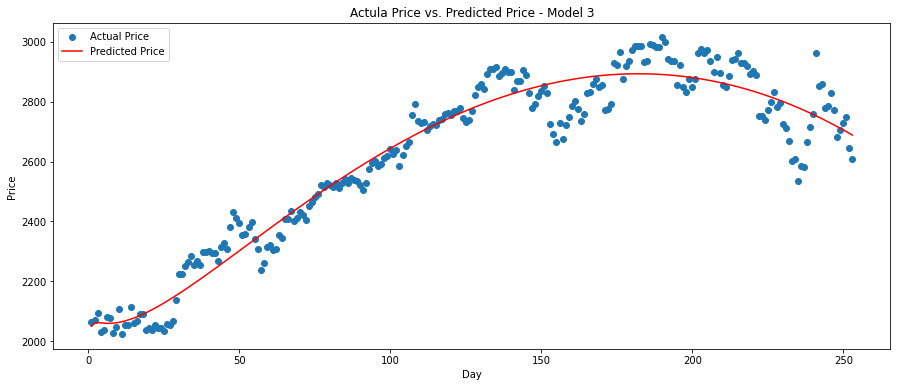

In [19]:
# Plot actual price vs. predicted price of Model 3

plt.figure(figsize = (15, 6))
plt.scatter(x=day, y=price_actual, label='Actual Price')
plt.plot(day, price_pred_3, 'r', label='Predicted Price')
plt.xlabel("Day")
plt.ylabel("Price")
plt.title("Actula Price vs. Predicted Price - Model 3")
plt.legend()
plt.show()

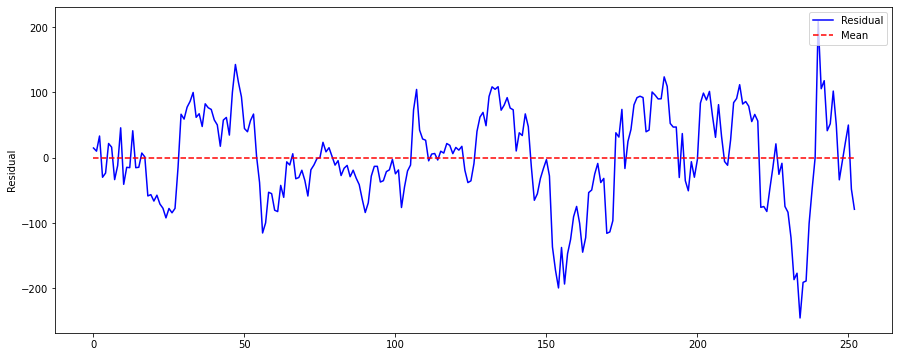

Mean of Residual:    2.412538946833528e-09
S.D. of Residual:    71.79093159131999
Half Width :         8.888903552215659   (degree of freedom = 252, Confidence Level = 0.95)
p-value :            1.0000


In [20]:
# let's take a look at residuals of Model 3

bijan.resid(resid)

### <span style="color:GREEN">Q1. (j) </span>
#### <span style="color:BLACK">Split the share price data into a training set (first 181 days) and a test set (days 182 to 253)</span>

In [21]:
# for better validation, we can split the data into train and test sets
# (train set: first 181 days, test set: from day 182 to 253)
# we'll fit a regression model on the training data and test its performance on the test data.

train_set = df[:181]
test_set = df[181:]
test_set

,Day,Price,Sqrt_Day,Sqr_Day,Log_Day
181,182,2987.030029,13.490738,33124,5.204007
182,183,2984.969971,13.527749,33489,5.209486
183,184,2932.520020,13.564660,33856,5.214936
184,185,2934.959961,13.601471,34225,5.220356
185,186,2992.909912,13.638182,34596,5.225747
...,...,...,...,...,...
248,249,2706.000000,15.779734,62001,5.517453
249,250,2728.510010,15.811388,62500,5.521461
250,251,2749.750000,15.842980,63001,5.525453
251,252,2646.169922,15.874508,63504,5.529429


### <span style="color:GREEN">Q1. (k) </span>
Fit the three models above to the training set and compute their MSE on the test set

### <span style="color:RED">Model 1</span>

In [22]:
# let's run a linear regression Price_t= beta_0 + beta_1 * t + eps_t
# here we run regression for price (y_t) based on day (t)

lm = sm.OLS.from_formula('Price ~ Day', train_set) 
model_1 = lm.fit()

# results of the OLS regression
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2006.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           3.49e-99
Time:                        23:59:39   Log-Likelihood:                -1054.2
No. Observations:                 181   AIC:                             2112.
Df Residuals:                     179   BIC:                             2119.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2052.8283     12.294    166.973      0.000    2028.568    2077.089
Day            5.2475      0.117     44.788      0.000       5.016       5.479
==============================================================================
Omnibus:                        6.412   Durbin-Watson:                   0.172
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.272
Skew:                          -0.411   Prob(JB):                       0.0435
Kurtosis:                       2.607   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Predict price based on Day 
price_pred_1 = model_1.predict(test_set)

# Calculate the residual
resid = price_actual[181:] - price_pred_1

# Calculate the error terms
mse1= np.mean(np.square(resid)) 
rmse1 = np.sqrt(mse1)

print('MSE Model 1  =', mse1)
print('RMSE Model 1 =', rmse1)

MSE Model 1  = 172394.23438575785
RMSE Model 1 = 415.20384678583827


### <span style="color:RED">Model 2</span>

In [24]:
# let's now fit a different model with more predictors Price_t= beta_0 + beta_1 t + beta_2 sqrt(t) + beta_3 t^2+ eps_t
#Note that the predictors are already in the data file.

lm2 = sm.OLS.from_formula('Price ~ Day + Sqrt_Day + Sqr_Day', train_set)
model_2 = lm2.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1181.
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          9.66e-117
Time:                        23:59:39   Log-Likelihood:                -1005.1
No. Observations:                 181   AIC:                             2018.
Df Residuals:                     177   BIC:                             2031.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2172.4757     46.010     47.217      0.000    2081.676    2263.275
Day           18.4458      1.904      9.689      0.000      14.689      22.203
Sqrt_Day     -96.1645     18.556     -5.182      0.000    -132.784     -59.545
Sqr_Day       -0.0413      0.005     -8.861      0.000      -0.050      -0.032
==============================================================================
Omnibus:                        0.937   Durbin-Watson:                   0.297
Prob(Omnibus):                  0.626   Jarque-Bera (JB):                1.053
Skew:                          -0.148   Prob(JB):                        0.591
Kurtosis:                       2.771   Cond. No.                     1.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# Predict price based on Day + Square Root of Day and Square of Day
price_pred_2 = model_2.predict(test_set)

# Calculate the residual
resid = price_actual[181:] - price_pred_2

# Calculate the error terms
mse2= np.mean(np.square(resid)) 
rmse2 = np.sqrt(mse2)

print('MSE of Model 2  =', mse2)
print('RMSE of Model 2 =', rmse2)

MSE of Model 2  = 9550.00845427646
RMSE of Model 2 = 97.72414468429211


### <span style="color:RED">Model 3</span>

In [26]:
# let's now fit a different model with more predictors Price_t= beta_0 + beta_1 t + beta_2 sqrt(t) + beta_3 t^2 + beta_3 Log(t) + eps_t

lm3 = sm.OLS.from_formula('Price ~ Day + Sqrt_Day + Sqr_Day + Log_Day', train_set)
model_3 = lm3.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     881.8
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          3.15e-115
Time:                        23:59:39   Log-Likelihood:                -1005.0
No. Observations:                 181   AIC:                             2020.
Df Residuals:                     176   BIC:                             2036.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2191.4506     58.874     37.223      0.000    2075.262    2307.640
Day           21.0001      5.285      3.974      0.000      10.571      31.430
Sqrt_Day    -138.9131     84.551     -1.643      0.102    -305.778      27.952
Sqr_Day       -0.0451      0.009     -5.147      0.000      -0.062      -0.028
Log_Day       41.7044     80.467      0.518      0.605    -117.099     200.508
==============================================================================
Omnibus:                        0.838   Durbin-Watson:                   0.296
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.955
Skew:                          -0.142   Prob(JB):                        0.620
Kurtosis:                       2.786   Cond. No.                     3.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# Predict price based on Day + Square Root of Day + Square of Day + Log of Day
price_pred_3 = model_3.predict(test_set)

# Calculate the residual
resid = price_actual[181:] - price_pred_3

# Calculate the error terms
mse3= np.mean(np.square(resid)) 
rmse3 = np.sqrt(mse3)

print('MSE =', mse3)
print('RMSE =', rmse3)

MSE = 10581.068448557731
RMSE = 102.86432058083955


### <span style="color:RED">SUMMARY OF RESULTS</span>
#### <span style="color:BLACK">Comparing the suggested models in terms of error rates on test set</span>

In [28]:
est = ['Model 1', 'Model 2', 'Model 3']

MSE_tot = []
RMSE_tot = []

No_of_Models = 3

for i in range(1, No_of_Models+1):
    MSE_tot.append(globals()['{}{}'.format('mse', i)])
    RMSE_tot.append(globals()['{}{}'.format('rmse', i)])
    
results = {
    'MSE': MSE_tot,
    'RMSE': RMSE_tot
}

pd.options.display.float_format = '{:,.2f}'.format

df_results = pd.DataFrame(results, index=est)
df_results

,MSE,RMSE
Model 1,"172,394.23",415.20
Model 2,"9,550.01",97.72
Model 3,"10,581.07",102.86


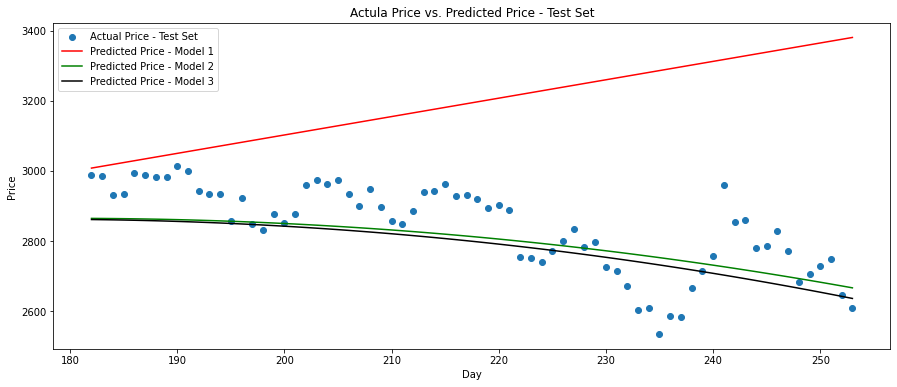

In [29]:
# Plot actual price vs. predicted price of Models on Test Set

plt.figure(figsize = (15, 6))
plt.scatter(x=day[181:], y=price_actual[181:], label='Actual Price - Test Set')
plt.plot(day[181:], price_pred_1, 'r', label='Predicted Price - Model 1')
plt.plot(day[181:], price_pred_2, 'g', label='Predicted Price - Model 2')
plt.plot(day[181:], price_pred_3, 'k', label='Predicted Price - Model 3')
plt.xlabel("Day")
plt.ylabel("Price")
plt.title("Actula Price vs. Predicted Price - Test Set")
plt.legend()
plt.show()

### <span style="color:RED">Q2. Australian beer production</span>

In [30]:
# let's  now turn our attention to Australian Beer Production Data to see an example of a seasonal series
# I prepared the seasonal predictors  on the spreadsheet, M1 is the dummy for January, M2 for February etc. 
# There's also a trend term just in case 't'

df = pd.read_csv('ausbeer_dummies.csv')
month = df['Month']
production_actual = df['Production']
df.head()

,Month,Production,t,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11
0,1,164,1,1,0,0,0,0,0,0,0,0,0,0
1,2,148,2,0,1,0,0,0,0,0,0,0,0,0
2,3,152,3,0,0,1,0,0,0,0,0,0,0,0
3,4,144,4,0,0,0,1,0,0,0,0,0,0,0
4,5,155,5,0,0,0,0,1,0,0,0,0,0,0


### <span style="color:GREEN">Q2. (a)</span>
#### <span style="color:BLACK">Fit the following model to the whole data using OLS:</span>
#### $y_t = \beta_0  + \beta_1 t + \beta_2 x_{1t} + \beta_3 x_{2t} + ... + \beta_{12} x_{11t}$

In [31]:
# fit the model with a trend term and 11 monthly dummies

model_beer = sm.OLS.from_formula('Production ~ t+M1+M2+M3+M4+M5+M6+M7+M8+M9+M10+M11', df)
result_1 = model_beer.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Production   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     18.30
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           3.97e-13
Time:                        23:59:40   Log-Likelihood:                -194.93
No. Observations:                  56   AIC:                             415.9
Df Residuals:                      43   BIC:                             442.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    192.9750      5.015     38.477      0.000     182.861     203.089
t             -0.2158      0.075     -2.887      0.006      -0.367      -0.065
M1           -39.7792      6.030     -6.597      0.000     -51.940     -27.619
M2           -48.5633      6.026     -8.059      0.000     -60.715     -36.411
M3           -30.9475      6.023     -5.139      0.000     -43.093     -18.802
M4           -46.7317      6.020     -7.762      0.000     -58.873     -34.591
M5           -46.1158      6.019     -7.662      0.000     -58.254     -33.978
M6           -58.5000      6.018     -9.720      0.000     -70.637     -46.363
M7           -51.8842      6.019     -8.620      0.000     -64.022     -39.746
M8           -42.2683      6.020     -7.021      0.000     -54.409     -30.127
M9           -46.6475      6.348     -7.349      0.000     -59.449     -33.846
M10          -19.6817      6.346     -3.102      0.003     -32.479      -6.884
M11           -2.9658      6.344     -0.467      0.643     -15.760       9.829
==============================================================================
Omnibus:                        1.949   Durbin-Watson:                   2.427
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.833
Skew:                           0.352   Prob(JB):                        0.400
Kurtosis:                       2.461   Cond. No.                         439.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style="color:GREEN">Q2. (b) </span>
#### <span style="color:BLACK">Explore the results summary and see whether the regression is signifficant</span>

In [32]:
# Extract data from above table:

print('R-squared:         ', result_1.rsquared)
print('Prob(F-statistic): ', result_1.f_pvalue)
print('Intercept:         ', result_1.params.Intercept)
print('Coef_t:            ', result_1.params.t)
print('Coef_M1:           ', result_1.params.M1)
print('Coef_M2:           ', result_1.params.M2)
print('Coef_M11:          ', result_1.params.M11)
print('p-values:')
result_1.pvalues

R-squared:          0.8362454429553052
Prob(F-statistic):  3.97159559050184e-13
Intercept:          192.97500000000005
Coef_t:             -0.2158333333333331
Coef_M1:            -39.77916666666658
Coef_M2:            -48.56333333333332
Coef_M11:           -2.965833333333336
p-values:


Intercept   0.00
t           0.01
M1          0.00
M2          0.00
M3          0.00
M4          0.00
M5          0.00
M6          0.00
M7          0.00
M8          0.00
M9          0.00
M10         0.00
M11         0.64
dtype: float64

### <span style="color:GREEN">Q2. (c) </span>
#### <span style="color:BLACK">Compute the MSE and RMSE of the fitted model</span>

In [33]:
# Predict production based on Month + 11 Dummies
production_pred_1 = result_1.predict(df)

# Calculate the residual
resid = production_actual - production_pred_1

# Calculate the error terms
mse1= np.mean(np.square(resid)) 
rmse1 = np.sqrt(mse1)

print('MSE_1  =', mse1)
print('RMSE_1 =', rmse1)

MSE_1  = 61.805178571428584
RMSE_1 = 7.86162696720142


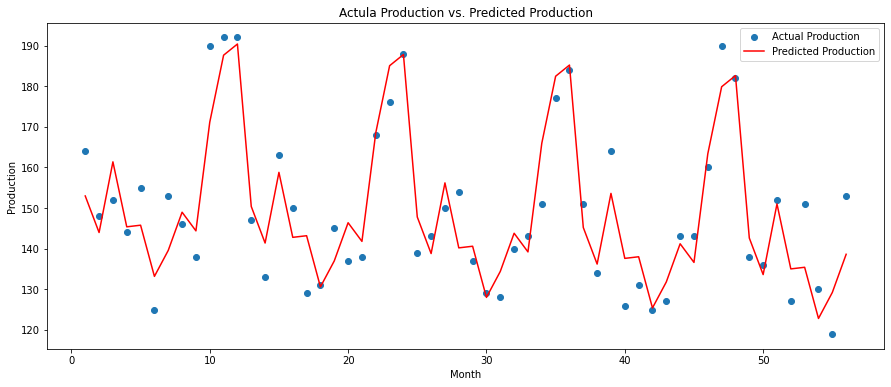

In [34]:
# Plot actual production vs. predicted production

plt.figure(figsize = (15, 6))
plt.scatter(x=month, y=production_actual, label='Actual Production')
plt.plot(month, production_pred_1, 'r', label='Predicted Production')
plt.xlabel("Month")
plt.ylabel("Production")
plt.title("Actula Production vs. Predicted Production")
plt.legend()
plt.show()

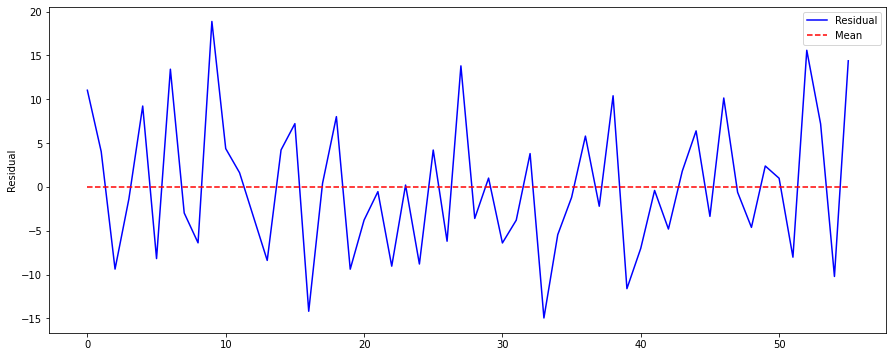

Mean of Residual:    -6.496390726949487e-14
S.D. of Residual:    7.932774362788161
Half Width :         2.124410845741564   (degree of freedom = 55, Confidence Level = 0.95)
p-value :            1.0000


In [35]:
# let's take a look at residuals

bijan.resid(resid)

### <span style="color:GREEN">Q2. (d)</span>
#### <span style="color:BLACK">Remove unsignificant from the model and fit a reduced model with the remaining parameters</span>
#### $y_t = \beta_0  + \beta_1 t + \beta_2 x_{1t} + \beta_3 x_{2t} + ... + \beta_{11} x_{10t}$

In [36]:
# The dummy for Month 11 is not statistically significant.
# Let's throw it out and test a reduced model with trend term and 10 dummies

model_beer = sm.OLS.from_formula('Production ~ t+M1+M2+M3+M4+M5+M6+M7+M8+M9+M10', df)
result_2 = model_beer.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Production   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     20.30
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           9.46e-14
Time:                        23:59:41   Log-Likelihood:                -195.07
No. Observations:                  56   AIC:                             414.1
Df Residuals:                      44   BIC:                             438.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    191.4799      3.829     50.010      0.000     183.763     199.196
t             -0.2154      0.074     -2.907      0.006      -0.365      -0.066
M1           -38.2944      5.080     -7.538      0.000     -48.532     -28.056
M2           -47.0790      5.076     -9.275      0.000     -57.308     -36.850
M3           -29.4636      5.072     -5.809      0.000     -39.686     -19.241
M4           -45.2481      5.070     -8.924      0.000     -55.466     -35.030
M5           -44.6327      5.069     -8.805      0.000     -54.849     -34.417
M6           -57.0173      5.069    -11.248      0.000     -67.233     -46.801
M7           -50.4019      5.070     -9.941      0.000     -60.620     -40.184
M8           -40.7864      5.072     -8.041      0.000     -51.009     -30.564
M9           -45.1636      5.448     -8.290      0.000     -56.144     -34.184
M10          -18.1981      5.446     -3.341      0.002     -29.174      -7.222
==============================================================================
Omnibus:                        1.741   Durbin-Watson:                   2.440
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.628
Skew:                           0.312   Prob(JB):                        0.443
Kurtosis:                       2.445   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style="color:GREEN">Q2. (e) </span>
#### <span style="color:BLACK">Explore the results summary and see whether the regression is signifficant</span>

In [37]:
# Extract data from above table:

print('R-squared:         ', result_2.rsquared)
print('Prob(F-statistic): ', result_2.f_pvalue)
print('Intercept:         ', result_2.params.Intercept)
print('Coef_t:            ', result_2.params.t)
print('Coef_M1:           ', result_2.params.M1)
print('Coef_M2:           ', result_2.params.M2)
print('Coef_M10:          ', result_2.params.M10)
print('p-values:')
result_2.pvalues

R-squared:          0.8354132123803122
Prob(F-statistic):  9.458236488924612e-14
Intercept:          191.47993334259127
Coef_t:             -0.21542146924038635
Coef_M1:            -38.294396611581746
Coef_M2:            -47.07897514234135
Coef_M10:           -18.19813220386051
p-values:


Intercept   0.00
t           0.01
M1          0.00
M2          0.00
M3          0.00
M4          0.00
M5          0.00
M6          0.00
M7          0.00
M8          0.00
M9          0.00
M10         0.00
dtype: float64

### <span style="color:GREEN">Q2. (f) </span>
#### <span style="color:BLACK">Compute the MSE and RMSE of the fitted model</span>

In [38]:
# Predict production based on Month + 11 Dummies
production_pred_2 = result_2.predict(df)

# Calculate the residual
resid = production_actual - production_pred_2

# Calculate the error terms
mse1= np.mean(np.square(resid)) 
rmse1 = np.sqrt(mse1)

print('MSE_1  =', mse1)
print('RMSE_1 =', rmse1)

MSE_1  = 62.119283780030564
RMSE_1 = 7.881578761899837


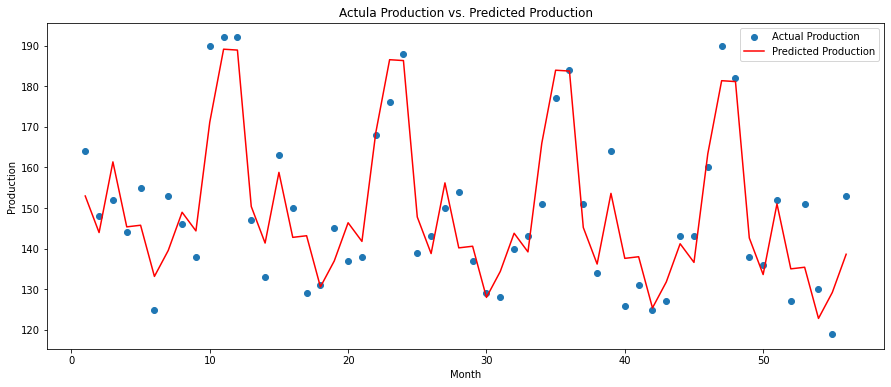

In [39]:
# Plot actual production vs. predicted production

plt.figure(figsize = (15, 6))
plt.scatter(x=month, y=production_actual, label='Actual Production')
plt.plot(month, production_pred_2, 'r', label='Predicted Production')
plt.xlabel("Month")
plt.ylabel("Production")
plt.title("Actula Production vs. Predicted Production")
plt.legend()
plt.show()

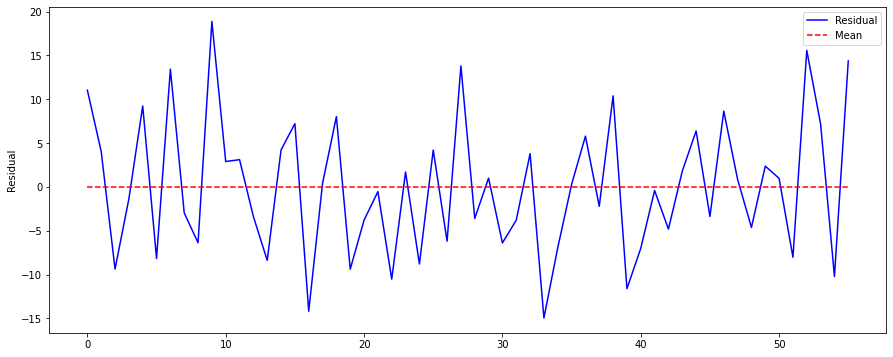

Mean of Residual:    1.1216424614498725e-13
S.D. of Residual:    7.952906720394993
Half Width :         2.1298023263124635   (degree of freedom = 55, Confidence Level = 0.95)
p-value :            1.0000


In [40]:
# let's take a look at residuals

bijan.resid(resid)